Import

In [2]:
from stroke import *

# Analyse dataset

## Lecture Dataset

In [3]:
# Lecture du fichier CSV
df = pd.read_csv("../healthcare-dataset-stroke-data.csv")

## head

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## shape

In [5]:
# Prise en compte des dimensions du dataframe
df.shape

print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataframe contient 5110 lignes et 12 colonnes


## info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

## describe

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## % valeurs abberantes et manquantes

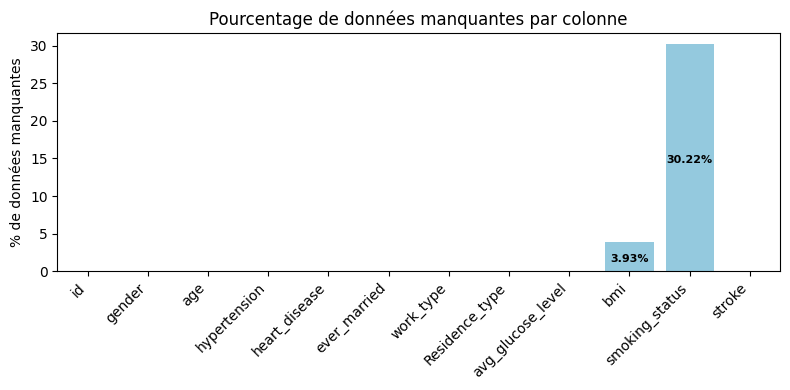

In [10]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = df.copy()
pourcentage_manquant_par_colonne["smoking_status"] = pourcentage_manquant_par_colonne["smoking_status"].replace("Unknown", np.nan)
pourcentage_manquant_par_colonne = pourcentage_manquant_par_colonne.isnull().sum() / len(df) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
sns.barplot(pourcentage_manquant_par_colonne, color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel("% de données manquantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Ajouter les valeurs non nulles au-dessus de chaque barre
for i, v in enumerate(pourcentage_manquant_par_colonne.values):
    if v != 0:  # Vérifier si la valeur est non nulle
        plt.text(i, (v / 2) - 1, f"{round(v, 2)}%", ha='center', va='bottom', fontsize=8, fontweight='bold')
        

plt.show()

Pas d'aberration au vu du describe

## Analyse univariée (a faire pour chaque variable)

### Variables quantitatives

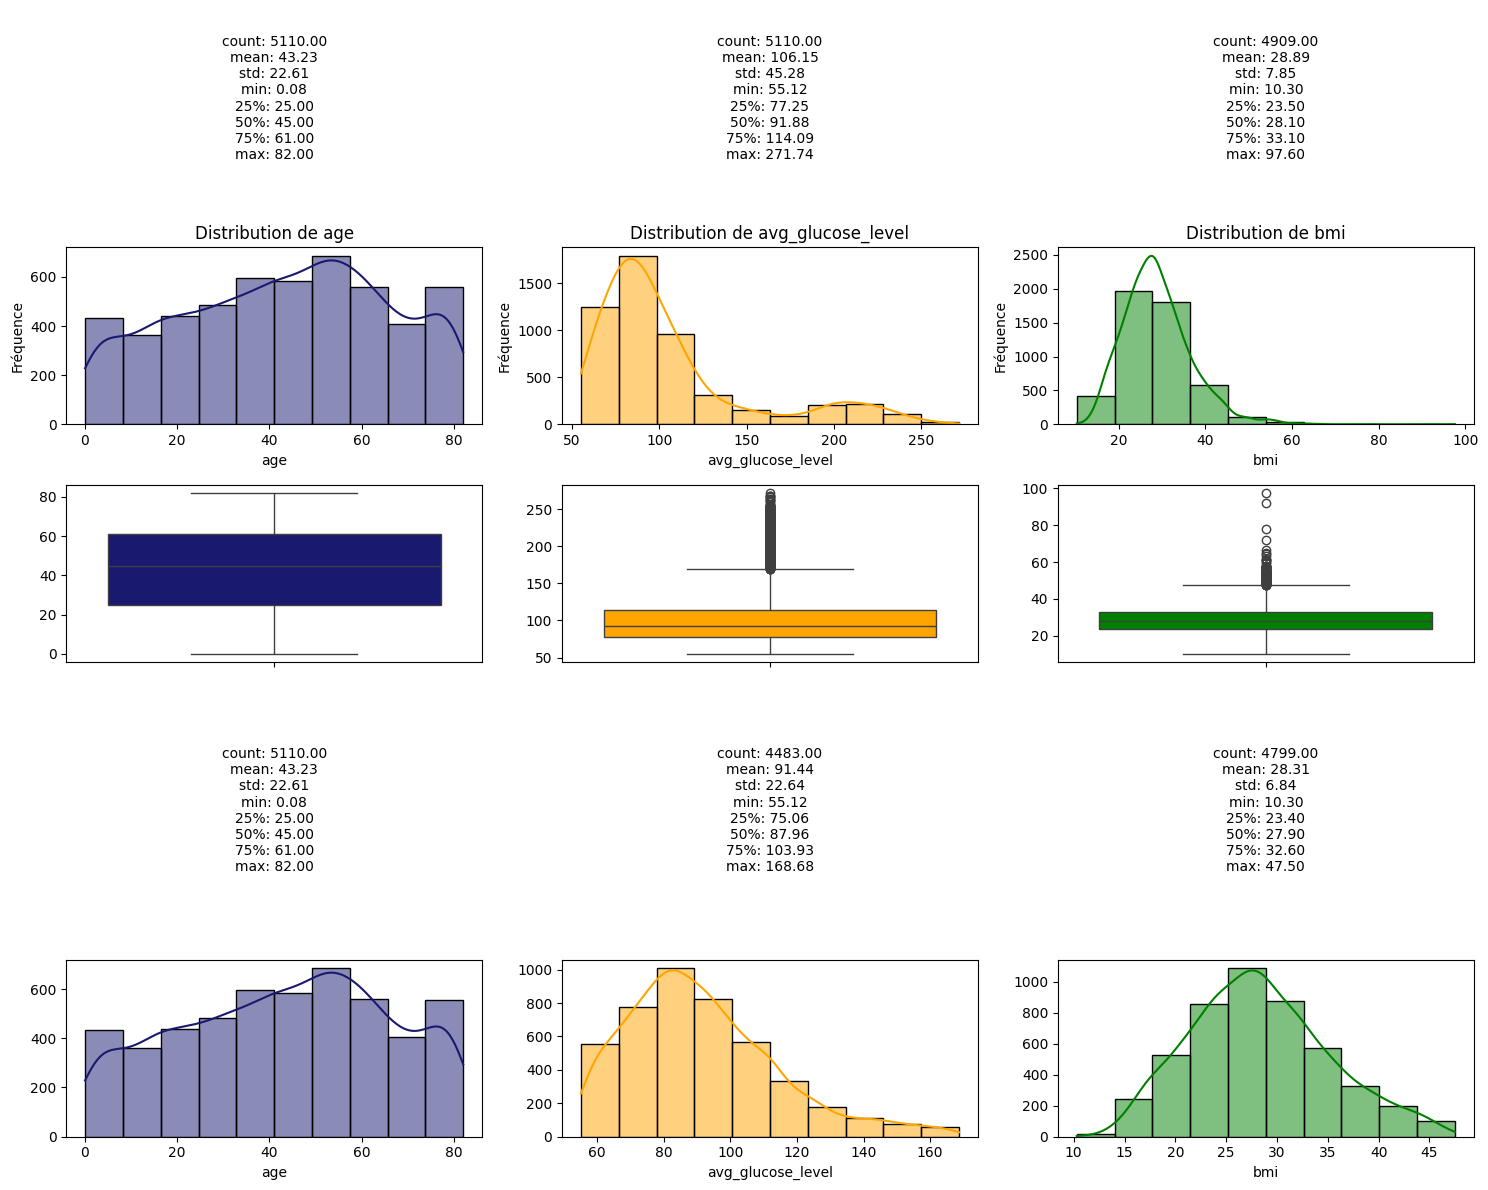

In [11]:
# Création de la figure et des axes
fig, axes = plt.subplots(5, len(variables_quantitatives), figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')

    # Histogramme des données brutes
    sns.histplot(df[variable], bins=10, color=color, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_ylabel('Fréquence')

    # Boîte à moustaches
    sns.boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color), ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_ylabel('')

    # Histogramme des données filtrées (sans valeurs aberrantes)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    
    # Statistiques descriptives
    stats_filtred = filtered_data[variable].describe()
    stats_text_filtred = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats_filtred.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[3, i].text(0.5, 0.5, stats_text_filtred, fontsize=10, ha='center', va='center', transform=axes[3, i].transAxes)
    axes[3, i].axis('off')
    
    
    sns.histplot(filtered_data[variable], bins=10, color=color, kde=True, ax=axes[4, i])
    axes[4, i].set_xlabel(variable)
    axes[4, i].set_ylabel('')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Variable qualitative

In [48]:
# Renommage des variables
df["gender"] = df["gender"].replace({
    "Male" : "Homme", 
    "Female" : "Femme", 
    "Other" : "Autre"
    })

df["hypertension"] = df["hypertension"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["heart_disease"] = df["heart_disease"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["work_type"] = df["work_type"].replace({
    'Private' : "Secteur privé", 
    'Self-employed' : "Auto-entrepreneur", 
    'Govt_job' : "Fonctionnaire", 
    'children' : "Enfant", 
    'Never_worked' : "Sans emploi"
    })

df["Residence_type"] = df["Residence_type"].replace({
    'Urban' : "Ville", 
    'Rural' : "Campagne"
    })

df["smoking_status"] = df["smoking_status"].replace({
    'formerly smoked' : "Ancien fumeur", 
    'never smoked' : "Non fumeur", 
    'smokes' : "Fumeur", 
    'Unknown' : "Non connu"
    })

df["stroke"] = df["stroke"].replace({
    1 : "Yes", 
    0 : "No"
    })

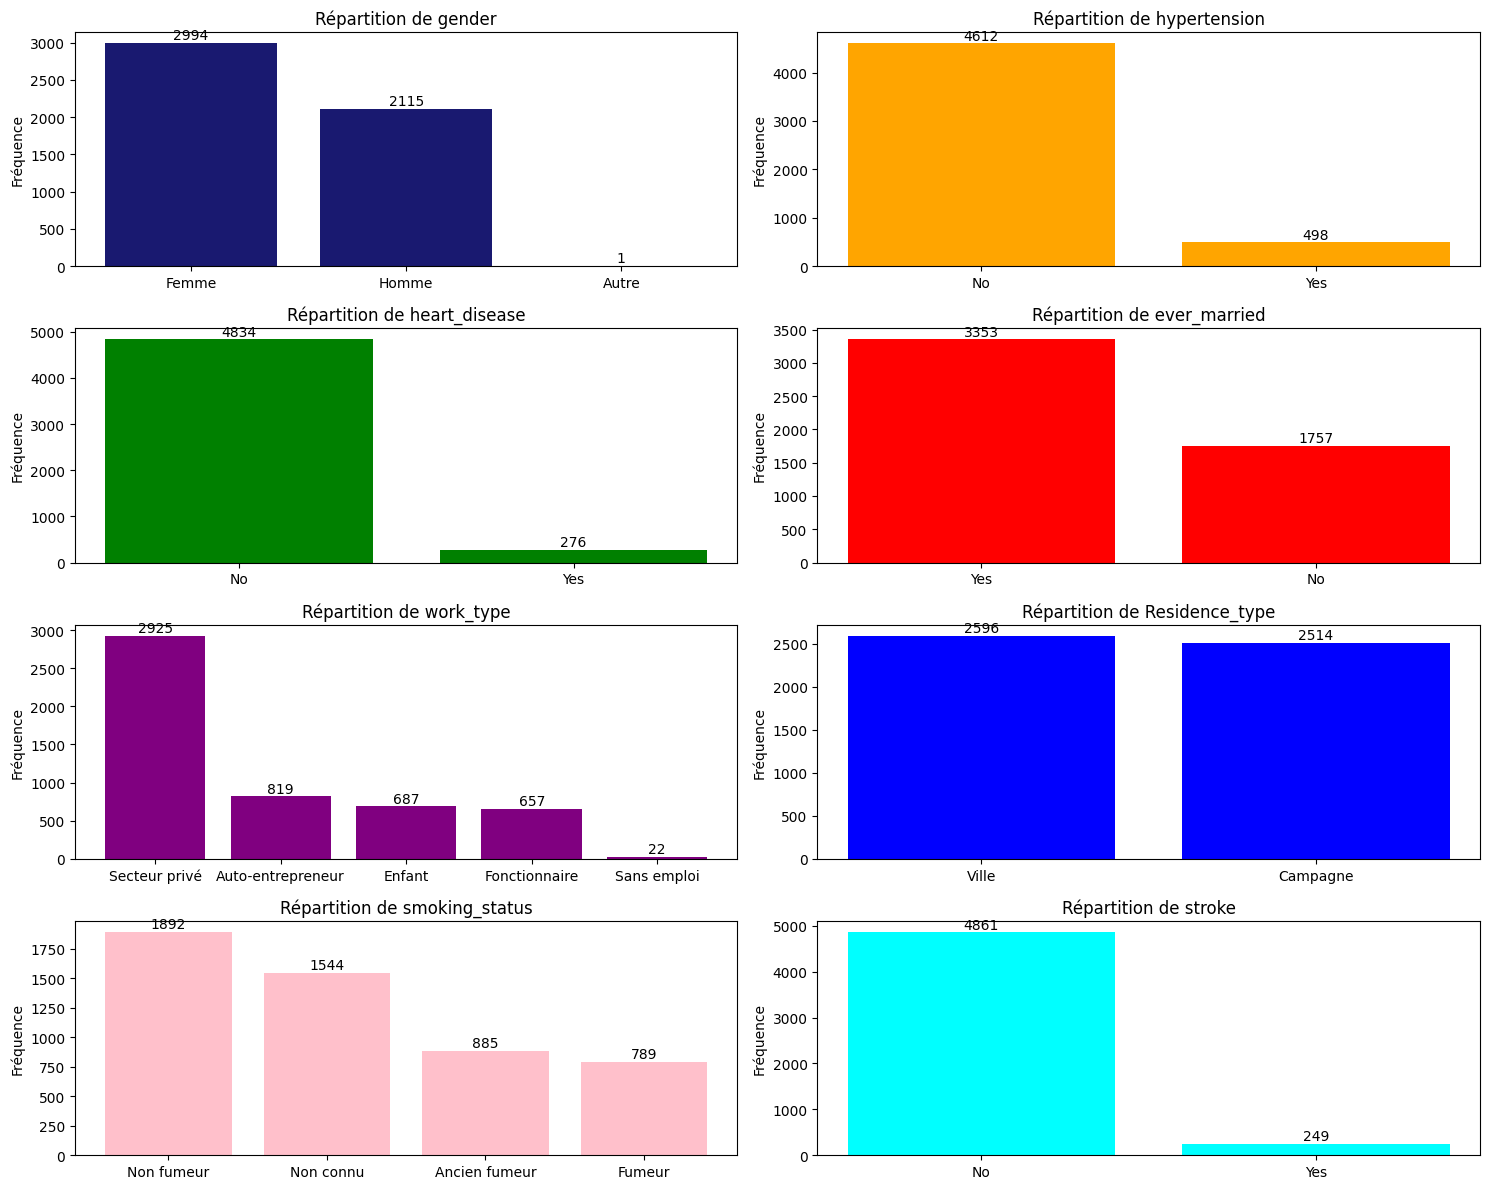

In [50]:
# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_last_row = num_total_variables % 2  # Nombre de graphiques sur la dernière ligne
num_rows = (num_total_variables - num_graphs_last_row) // 2 + num_graphs_last_row
num_cols = 2 if num_graphs_last_row == 0 else num_graphs_last_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

### Variable genre

#### correlation au choix (attention, il y a different type)

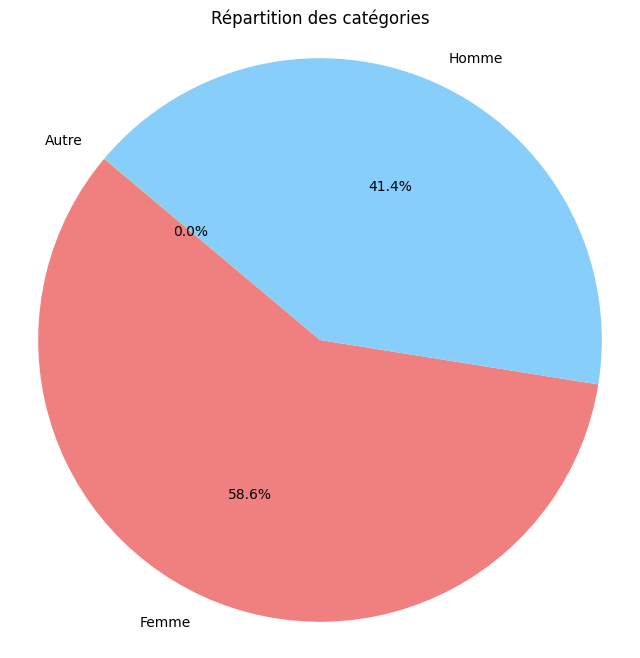

In [13]:
# Données pour le pieplot
colors = ['lightcoral', 'lightskyblue', 'yellowgreen']  # Couleurs pour chaque portion
label=["Femme", "Homme", "Autre"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["gender"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()


#### graphe

### Variable age

#### correlation au choix (attention, il y a different type)

#### graphe

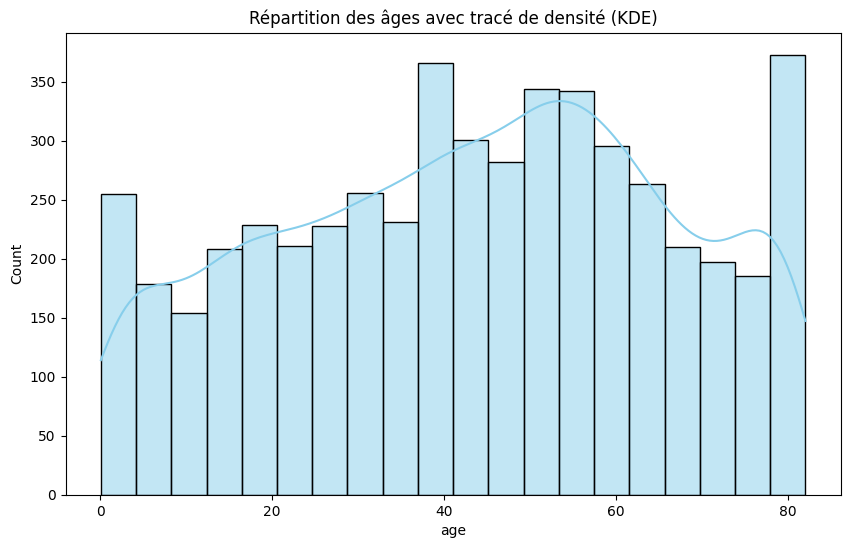

In [14]:
# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Histogramme des âges
sns.histplot(data=df, x="age", color="skyblue", kde=True)

# Titre du graphique
plt.title('Répartition des âges avec tracé de densité (KDE)')

# Affichage du graphique
plt.show()


### Variable hypertension

#### correlation au choix (attention, il y a different type)

#### graphe

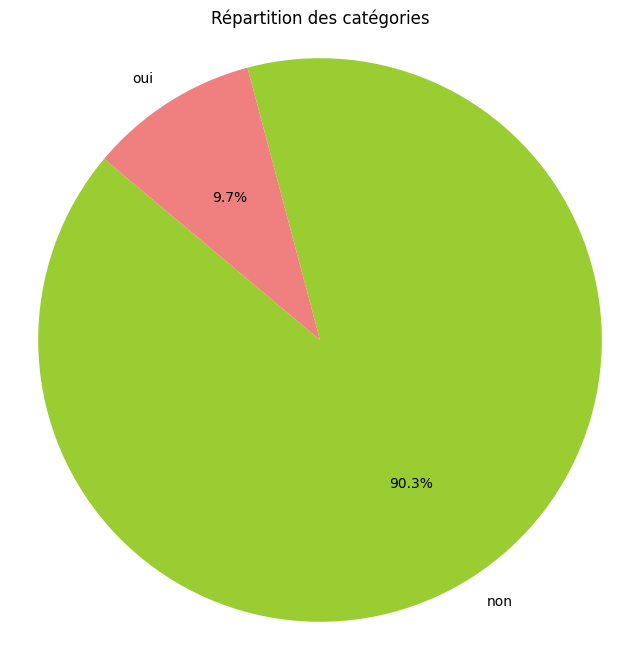

In [15]:
# Données pour le pieplot
colors = ['yellowgreen', 'lightcoral']  # Couleurs pour chaque portion
label=["non", "oui"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["hypertension"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()


### Variable heart_disease

#### correlation au choix (attention, il y a different type)

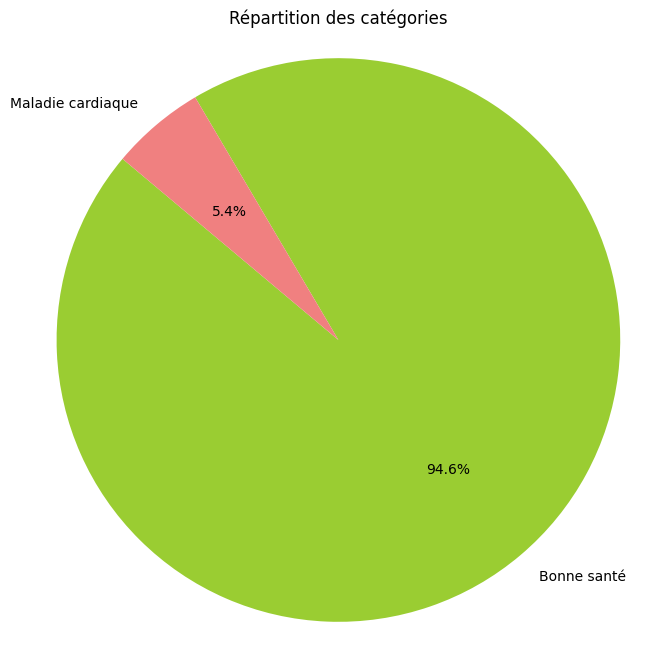

In [16]:
# Données pour le pieplot
colors = ['yellowgreen', 'lightcoral']  # Couleurs pour chaque portion
label = ["Bonne santé", "Maladie cardiaque"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["heart_disease"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

#### graphe

### Variable ever_married

#### correlation au choix (attention, il y a different type)

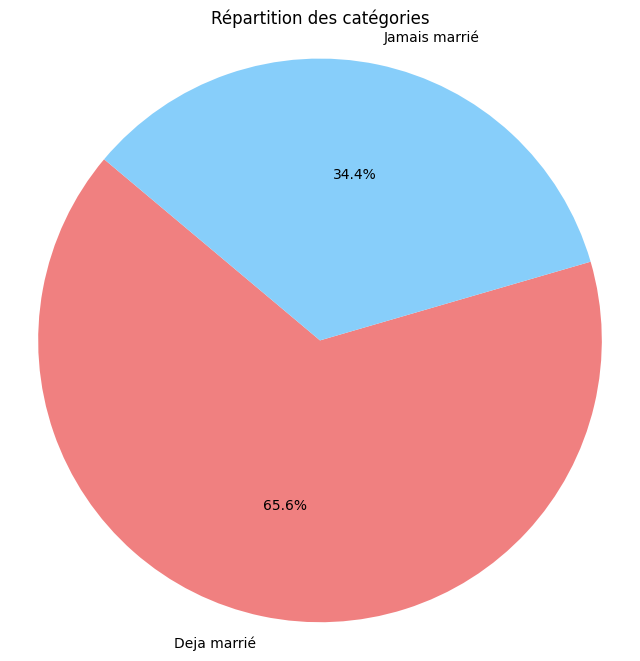

In [17]:
# Données pour le pieplot
colors = ['lightcoral', 'lightskyblue']  # Couleurs pour chaque portion
label = ["Deja marrié", "Jamais marrié"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["ever_married"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

#### graphe

### Variable work_type

#### correlation au choix (attention, il y a different type)

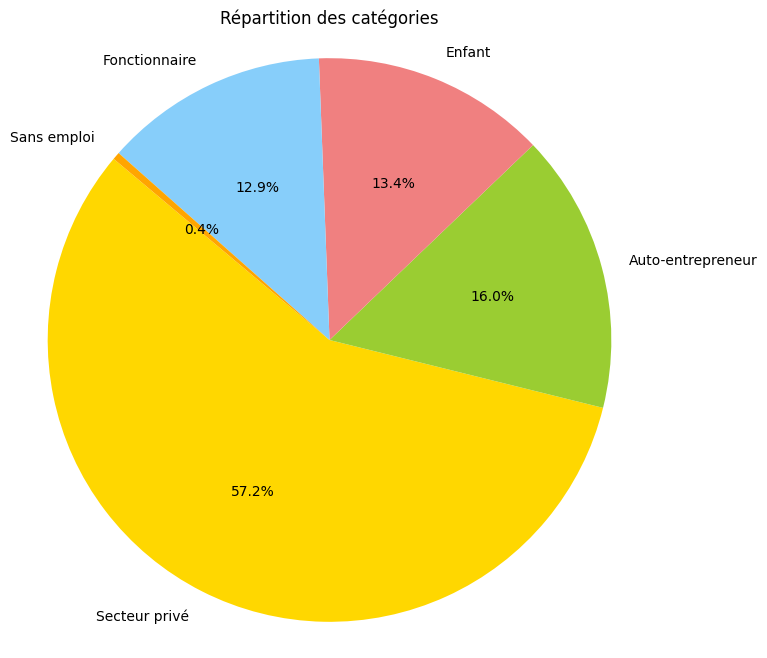

In [18]:
# Données pour le pieplot
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']  # Ajout d'une cinquième couleur
label = ["Secteur privé", "Auto-entrepreneur", "Enfant", "Fonctionnaire", "Sans emploi"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["work_type"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

#### graphe

### Variable Residence_type

#### correlation au choix (attention, il y a different type)

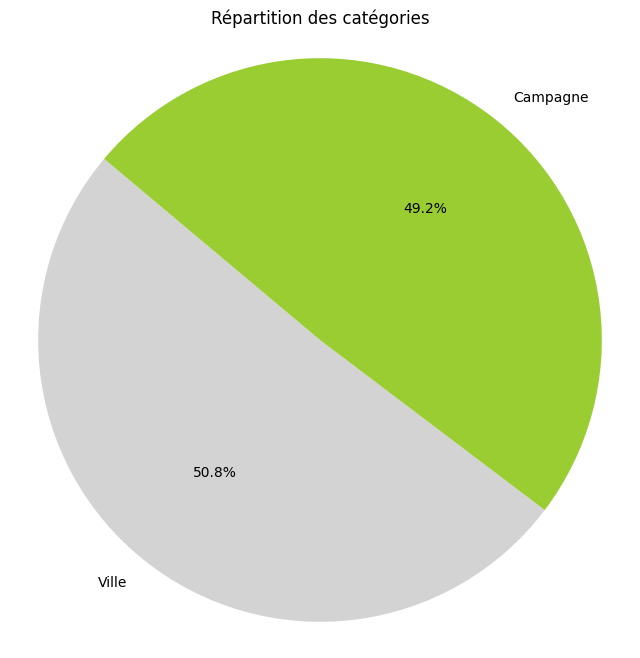

In [19]:
# Données pour le pieplot
colors = ['lightgrey', 'yellowgreen']  # Couleurs pour chaque portion
label = ["Ville", "Campagne"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["Residence_type"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

#### graphe

### Variable avg_glucose_level

#### correlation au choix (attention, il y a different type)

#### graphe

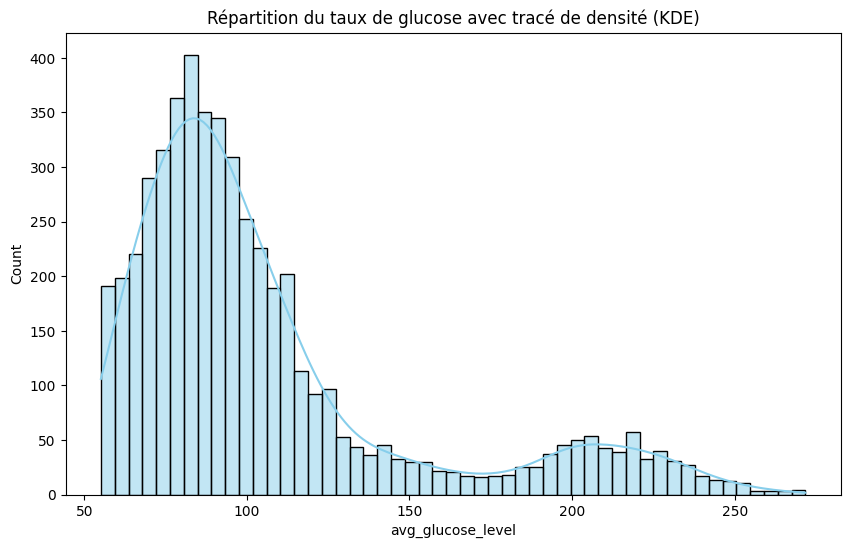

In [20]:
# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Histogramme des âges
sns.histplot(data=df, x="avg_glucose_level", color="skyblue", kde=True)

# Titre du graphique
plt.title('Répartition du taux de glucose avec tracé de densité (KDE)')

# Affichage du graphique
plt.show()


### Variable bmi

#### correlation au choix (attention, il y a different type)

#### graphe

Brut

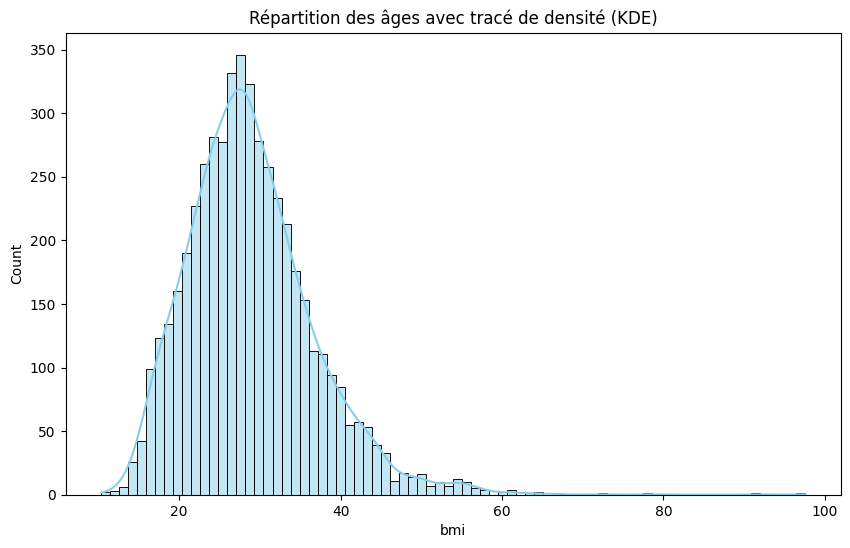

In [21]:
# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Histogramme des âges
sns.histplot(data=df, x="bmi", color="skyblue", kde=True)

# Titre du graphique
plt.title('Répartition des âges avec tracé de densité (KDE)')

# Affichage du graphique
plt.show()


<60

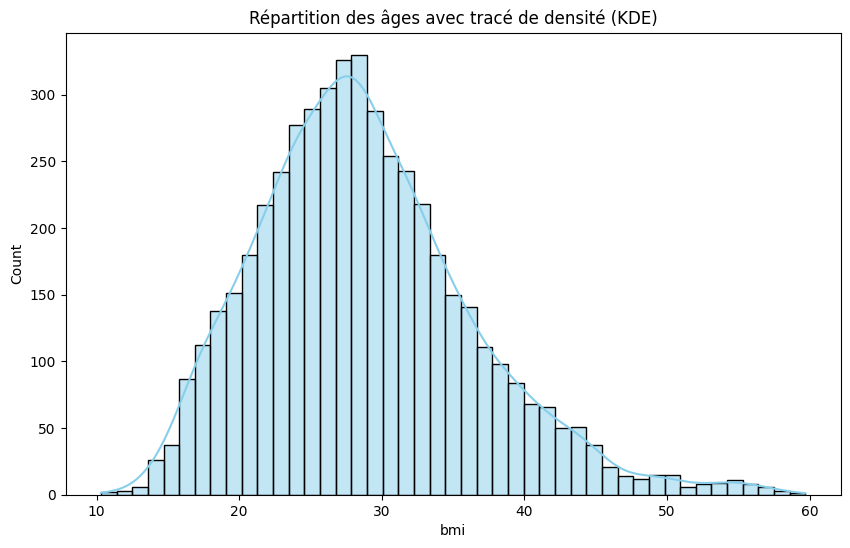

In [22]:
df_mince = df.loc[df["bmi"] < 60]

# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Histogramme des âges
sns.histplot(data=df_mince, x="bmi", color="skyblue", kde=True)

# Titre du graphique
plt.title('Répartition des âges avec tracé de densité (KDE)')

# Affichage du graphique
plt.show()


In [23]:
df_gros = df.loc[(df["bmi"].isna()) & (df["stroke"] == 1)]

df_gros

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


boite à moustache

### Variable smoking_status

#### correlation au choix (attention, il y a different type)

Avec les inconnus

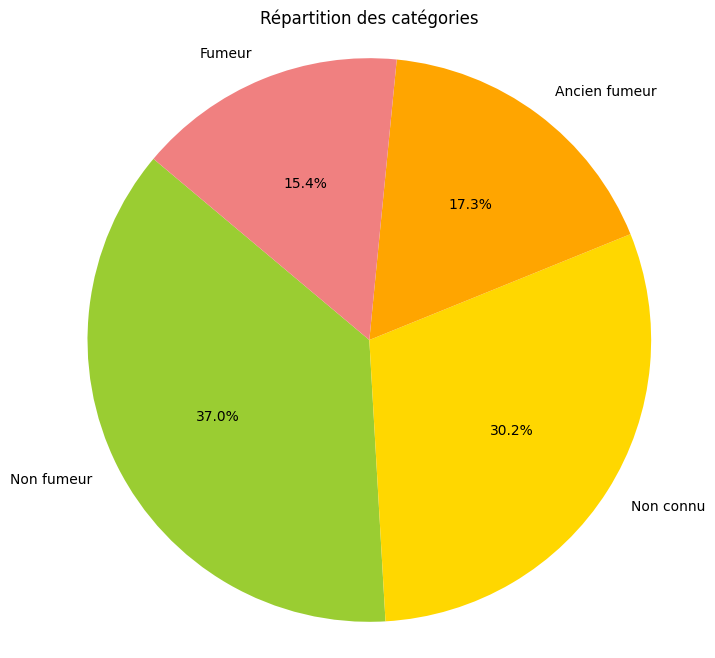

In [24]:
# Données pour le pieplot
colors = ['yellowgreen', 'gold', 'orange', 'lightcoral']  # Ajout d'une cinquième couleur
label = ["Non fumeur", "Non connu", "Ancien fumeur", "Fumeur"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df["smoking_status"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

Sans les inconnus

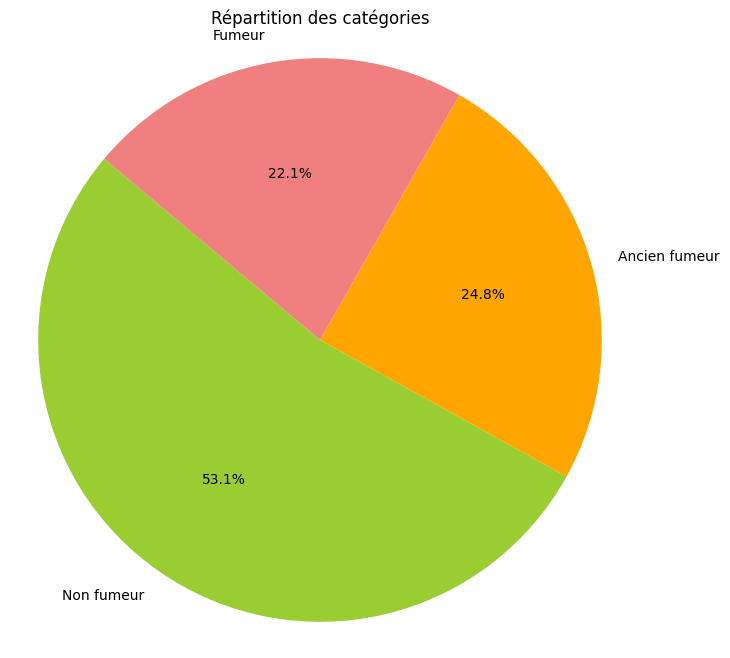

In [25]:
# Données pour le pieplot
colors = ['yellowgreen', 'orange', 'lightcoral']  # Ajout d'une cinquième couleur
label = ["Non fumeur", "Ancien fumeur", "Fumeur"]

df_sans_fumeur_inconnu = df.loc[df["smoking_status"] != "Unknown"]

# Création du pieplot
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df_sans_fumeur_inconnu["smoking_status"].value_counts(), labels=label, colors=colors, autopct='%1.1f%%', startangle=140)  # Création du pieplot avec pourcentages
plt.axis('equal')  # Pour que le pieplot soit un cercle plutôt qu'une ellipse

# Titre du pieplot
plt.title('Répartition des catégories')

# Affichage du pieplot
plt.show()

#### graphe

## Analyse bi-variée (a faire pour chaque variable)

### Variable "stroke" + "gender"

#### correlation au choix (attention, il y a different type)

In [26]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['stroke'], df['gender'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

gender  Female  Male  Other
stroke                     
0         2853  2007      1
1          141   108      0
Chi2: 0.47258662884530234
p-value: 0.7895490538408245
Il n'y a pas correlation


#### graphe

### Variable "stroke" + "heart_disease"

#### correlation au choix (attention, il y a different type)

In [27]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

stroke            0    1
heart_disease           
0              4632  202
1               229   47
Chi2: 90.25956125843324
p-value: 2.0887845685229236e-21
Il y a correlation


#### graphe

### Variable "stroke" + "ever_married"

#### correlation au choix (attention, il y a different type)

In [28]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

stroke           0    1
ever_married           
No            1728   29
Yes           3133  220
Chi2: 58.923890259034195
p-value: 1.6389021142314745e-14
Il y a correlation


#### graphe

### Variable "stroke" + "work_type"

#### correlation au choix (attention, il y a different type)

In [29]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['work_type'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2
Chi2: 49.163511976675295
p-value: 5.397707801896119e-10
Il y a correlation


### Variable "stroke" + "Residence_type"

#### correlation au choix (attention, il y a different type)

In [30]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135
Chi2: 1.0816367471627524
p-value: 0.29833169286876987
Il y a correlation


### Variable "stroke" + "smoking_status"

#### correlation au choix (attention, il y a different type)

In [31]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if chi2 < p:
    print("Il n'y a pas correlation")
else:
    print("Il y a correlation")

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42
Chi2: 29.147269191399264
p-value: 2.0853997025008455e-06
Il y a correlation


#### graphe

# Analyse modele

import scikit-learn

Partager dataset

train 70%
test 30%
par exemple

Possibilité de tester 40/60 ou 20/80

## Model 1 (Regression logistique)

### Entrainement du modele

### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)

## Model 2 ???

### Entrainement du modele

### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)

## Model 3 ???

### Entrainement du modele

### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)